In [1]:
pip install mplcursors


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install mysql-connector-python


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install humanize


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Estudo analítico sobre vendas de carros no Mercado Livre

### Importando os dados

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as p
import matplotlib

import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(12,8)})

In [5]:
import pymysql
import mysql.connector

In [6]:
# Testando a consulta
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='',
    database='carros_bd_ml'
)

cursor = conn.cursor()

In [7]:
query = "SELECT *FROM carros JOIN carros_info ON carros.id = carros_info.id";
df = pd.read_sql_query(query, conn)
df.columns

Index(['id', 'marca', 'modelo', 'ano', 'cor', 'tipo_de_combustivel', 'motor',
       'tipo_de_transmissao', 'quilometros', 'portas', 'price', 'id',
       'carros_id', 'com_ipva_pago', 'aceita_troca', 'entrega_a_domicilio',
       'unico_dono', 'com_preco_negociavel', 'hgienizacao_completa',
       'nao_aceita_troca', 'com_garantia_mecanica', 'test_drive_a_domicilio'],
      dtype='object')

In [8]:
df

,id,marca,modelo,ano,cor,tipo_de_combustivel,motor,tipo_de_transmissao,quilometros,portas,...,carros_id,com_ipva_pago,aceita_troca,entrega_a_domicilio,unico_dono,com_preco_negociavel,hgienizacao_completa,nao_aceita_troca,com_garantia_mecanica,test_drive_a_domicilio
0,1,hyundai,tucson,2020,branco,gasolina,1.6,automática,35000,4,...,2,1,1,0,0,0,0,0,0,0
1,2,hyundai,tucson,2020,branco,gasolina,1.6,automática,35000,4,...,3,0,1,0,0,0,1,0,0,0
2,3,chevrolet,onix,2023,cinza-escuro,gasolina e álcool,1.0,manual,65000,4,...,4,0,1,0,0,0,0,0,0,0
3,4,ford,ka,2018,branco,gasolina e álcool,1.0,manual,65000,4,...,5,0,1,0,0,0,1,0,0,0
4,5,jeep,renegade,2018,cinza-escuro,gasolina e álcool,1.8,automática,65000,4,...,6,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572,1573,bmw,320i,2021,cinza,gasolina e álcool,2.0,automática,65000,4,...,1574,1,1,0,0,0,1,0,0,0
1573,1574,nissan,versa,2018,preto,gasolina e álcool,1.6,automática,65000,4,...,1575,1,1,0,0,0,1,0,0,0
1574,1575,toyota,corolla,2011,prateado,gasolina-álcool e gás natural,2.0,automática,65000,4,...,1576,1,1,0,0,0,1,0,0,0
1575,1576,volkswagen,voyage,2019,prateado,gasolina e álcool,1.6,manual,65000,4,...,1577,0,0,0,0,0,0,0,0,0


### Dicionário de dados

|Coluna | Descrição |
|:------|-----------|
|carros_id|Identificador único dos carros|
|preço|preço de venda de cada carro|
|com_ipva_pago|informa se o carro ofertado já está com o ipva pago|
|aceita troca|informa se o vendedor aceita trocar o carro com outro comprador|
|entrega_a_domicilio|informa se o vendedor entregará o carro na casa do comprador|
|unico_dono|informa se o carro ofertado teve um único dono|
|com_preço_negociavel|informa se o vendedor está disposto a negociar o preço do automóvel|
|higienizazao_completa|informa se o carro ofertado já está higienizado|
|com_garantia_mecanica|informa se o carro ofertado possuii garantia mecânica| 
|test_drive_a_domicilio|informa se o vendedor possibilita um teste driv antes da compra|
|marca|informa a marca do carro|
|modelo|informa o modelo do carro|
|ano|informa de qual ano é o carro|
|cor|informa a cor do carro|
|tipo_de_combustivel|informa o tipo de combustível utilizado no carro, podendo ser Gasolina', 'Gasolina e álcool', 'Diesel', 'Etanol','Gasolina e elétrico', 'Híbrido', 'Gasolina-Álcool e gás natural', 'Flex', 'Álcool e gás natural'|
|motor|informa a potência do motor|
|tipo_de_transmissao|informa se a transmissão é automática ou manual
|quilometros|informa quantos quilometros rodados o carro possui|
|portas|informa a quantidade de portas que o carro possui|


### Quantos vendedores aceitam troca?

In [9]:
query = "SELECT aceita_troca, COUNT(aceita_troca) Sim FROM carros_info WHERE aceita_troca = True";
aceita_troca = pd.read_sql_query(query, conn)
aceita_troca


,aceita_troca,Sim
0,1,694


### Quantos vendedores não aceitam troca?

In [10]:
query = "SELECT aceita_troca, COUNT(aceita_Troca) Não FROM carros_info WHERE aceita_troca = False";
nao_aceita_troca = pd.read_sql_query(query, conn)
nao_aceita_troca

,aceita_troca,Não
0,0,883


In [11]:
((df['aceita_troca'] == False) & (df['nao_aceita_troca'] == False)).sum()

861

In [12]:
query = "SELECT aceita_troca, nao_aceita_troca, COUNT(*) nao_informado FROM carros_info WHERE aceita_Troca = False AND nao_aceita_troca = False"
nao_informado = pd.read_sql_query(query, conn)
nao_informado

,aceita_troca,nao_aceita_troca,nao_informado
0,0,0,861


### Qual a média de preços dos carros por cor

In [13]:
df['cor'].unique()

array(['branco', 'cinza-escuro', 'prateado', 'preto', 'vermelho', 'cinza',
       'prata', 'azul', 'verde', 'bege', 'marrom', 'dourado', 'violeta',
       'amarelo', 'cinza-claro', 'laranja', 'branca', 'bordô',
       'violeta-escuro'], dtype=object)

In [14]:
query = "SELECT cor, AVG(price) media_por_cor FROM carros GROUP BY (cor) ORDER BY (media_por_cor) DESC;"
preco_medio_cor = pd.read_sql_query(query, conn)
round(preco_medio_cor, 2)

,cor,media_por_cor
0,branca,419990.00
1,azul,199265.20
2,bege,134570.00
3,cinza,128077.43
4,violeta,119990.00
5,prata,115665.68
6,bordô,112800.00
7,branco,106079.38
8,verde,101612.44
9,cinza-claro,95999.00


### Qual o tipo de combustível mais utilizado nos automóveis?

In [15]:
df['tipo_de_combustivel'].unique()

array(['gasolina', 'gasolina e álcool', 'diesel', 'etanol',
       'gasolina e elétrico', 'híbrido', 'gasolina-álcool e gás natural',
       'flex', 'álcool e gás natural'], dtype=object)

In [16]:
query = "SELECT tipo_de_combustivel, COUNT(tipo_de_combustivel) quantidade FROM carros GROUP BY(tipo_de_combustivel) ORDER BY(quantidade) DESC"
tipo_combustivel = pd.read_sql_query(query, conn)
tipo_combustivel

,tipo_de_combustivel,quantidade
0,gasolina e álcool,1250
1,gasolina,144
2,diesel,110
3,gasolina-álcool e gás natural,41
4,flex,14
5,gasolina e elétrico,9
6,álcool e gás natural,5
7,híbrido,4
8,etanol,1


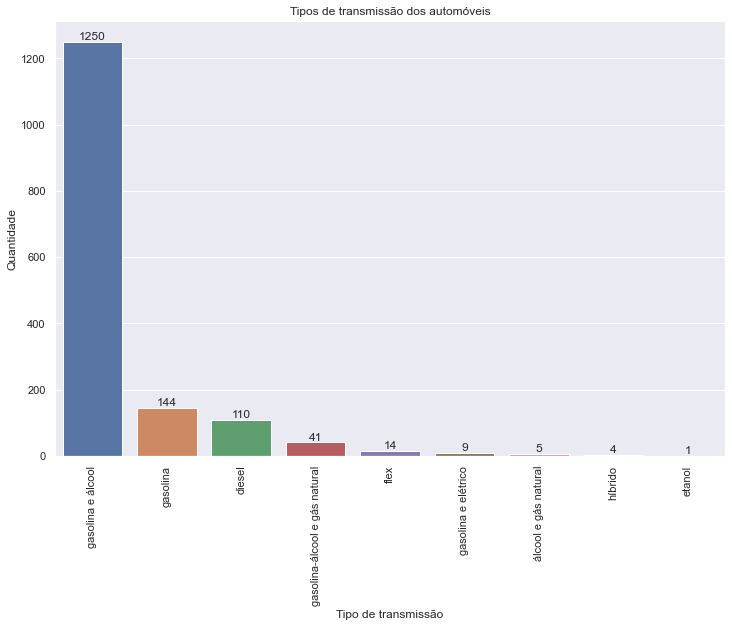

In [17]:
ax = sns.barplot(data = tipo_combustivel, x = 'tipo_de_combustivel', y = 'quantidade')
ax.set(title = 'Tipos de transmissão dos automóveis', xlabel = 'Tipo de transmissão', ylabel = 'Quantidade');
plt.xticks( rotation = 90)

for i in ax.containers:
    ax.bar_label(i)

### Qual o tipo de transmissão mais utilizada?

In [18]:
query = """

        """
tipo_transmissao = pd.read_sql_query(query, conn)
tipo_transmissao

,tipo_de_transmissao,quantidade
0,automática,863
1,manual,662
2,automática sequencial,43
3,semiautomática,10


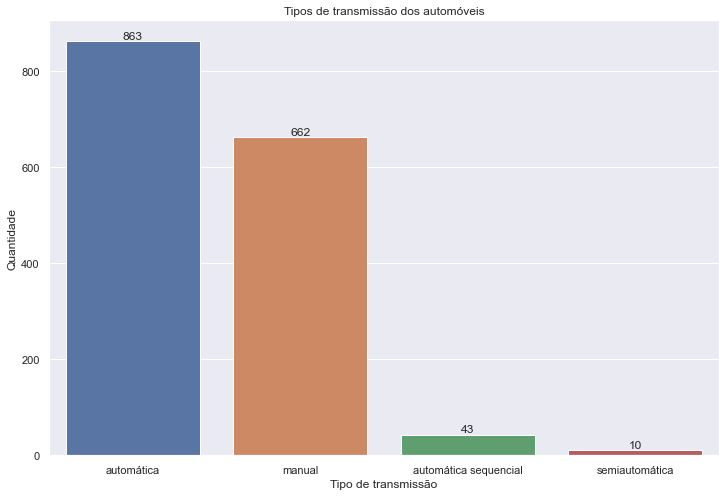

In [19]:
ax = sns.barplot(data = tipo_transmissao, x = 'tipo_de_transmissao', y = 'quantidade')
ax.set(title = 'Tipos de transmissão dos automóveis', xlabel = 'Tipo de transmissão', ylabel = 'Quantidade');

for i in ax.containers:
    ax.bar_label(i)

### Automóveis com o tipo de transmissão automática são mais caros?

In [20]:
query = """
    SELECT tipo_de_transmissao,
           AVG(price) avg_transmissao
           FROM carros
           GROUP BY(tipo_de_transmissao)
           ORDER BY(avg_transmissao) DESC
"""
avg_transmissao = pd.read_sql_query(query, conn)
round(avg_transmissao, 2)


,tipo_de_transmissao,avg_transmissao
0,automática,124764.23
1,automática sequencial,115276.77
2,semiautomática,73753.00
3,manual,65660.66


### Qual a média de preços por ano?

In [21]:
query = "SELECT ano, AVG(price) avg_por_ano FROM carros GROUP BY(ano) ORDER BY(avg_por_ano) DESC"
avg_ano = pd.read_sql_query(query, conn)
round(avg_ano, 2)

,ano,avg_por_ano
0,2023,216810.06
1,2022,156897.01
2,2024,143725.24
3,2021,123390.10
4,2020,106013.69
5,2019,99713.33
6,2018,94332.45
7,2017,79781.08
8,2016,74217.61
9,2012,72376.05


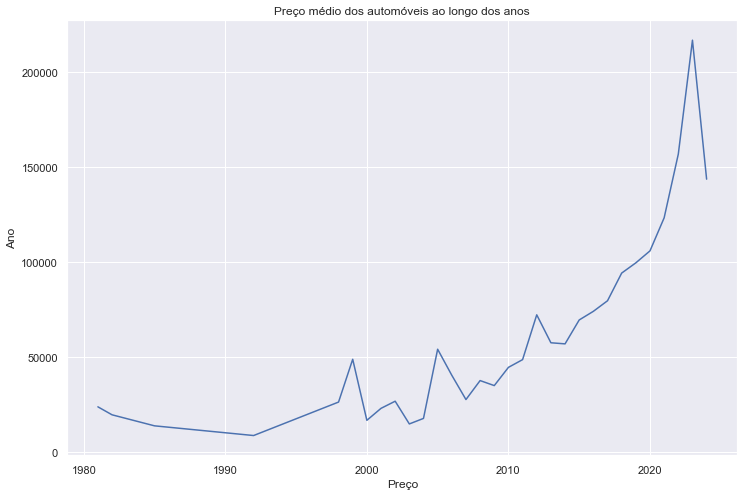

In [22]:
ax = sns.lineplot(data = avg_ano, x = 'ano', y = 'avg_por_ano')
ax.set(title = 'Preço médio dos automóveis ao longo dos anos', xlabel = 'Preço', ylabel = 'Ano');

### Quantos vendedores estão dispostos a negociarem o preço de venda do automóvel?

In [23]:
query = "SELECT com_preco_negociavel, COUNT(*) Sim FROM carros_info WHERE com_preco_negociavel = True"
preco_negociavel = pd.read_sql_query(query, conn)
round(preco_negociavel, 2)

,com_preco_negociavel,Sim
0,1,109


### A média de preços dos carros dos vendedores que estão dispostos a negociare o preço é maior do que a dos que não estão disposto?

In [24]:
query = """
    SELECT 
    round(AVG(CASE WHEN carinfo.com_preco_negociavel = True THEN car.price ELSE NULL END), 2) AS media_com_negociacao,
    round(AVG(CASE WHEN carinfo.com_preco_negociavel = False THEN car.price ELSE NULL END), 2)AS media_sem_negociacao
FROM 
    carros car 
    JOIN carros_info carinfo ON car.id = carinfo.id

"""
negociar_preco = pd.read_sql_query(query, conn)
negociar_preco

,media_com_negociacao,media_sem_negociacao
0,107689.4,98822.33


### Quantos carros já possuem o IPVA pago?

In [25]:
query = """
    SELECT com_ipva_pago, 
    COUNT(*) Quantidade
    FROM carros_info
    WHERE com_ipva_pago = True 
"""
ipva_pago = pd.read_sql_query(query, conn)
ipva_pago

,com_ipva_pago,Quantidade
0,1,536


### Qual a média de preço dos carros por marca e modelo?

In [26]:
query = """
    SELECT marca, modelo, AVG(price) media_por_marca FROM carros GROUP BY(marca) ORDER BY(price) DESC
    
"""
media_marca = pd.read_sql_query(query, conn)
round(media_marca, 2)

,marca,modelo,media_por_marca
0,lamborghini,gallardo,1380000.00
1,audi,q5,327395.00
2,ram,classic,382395.00
3,mercedes-benz,sprinter van,247640.69
4,dodge,ram 2500,330000.00
5,jaguar,f-pace,224700.00
6,bmw,x2,231427.51
7,renault,master,76539.99
8,porsche,cayenne,721633.33
9,land rover,range rover evoque,357022.83


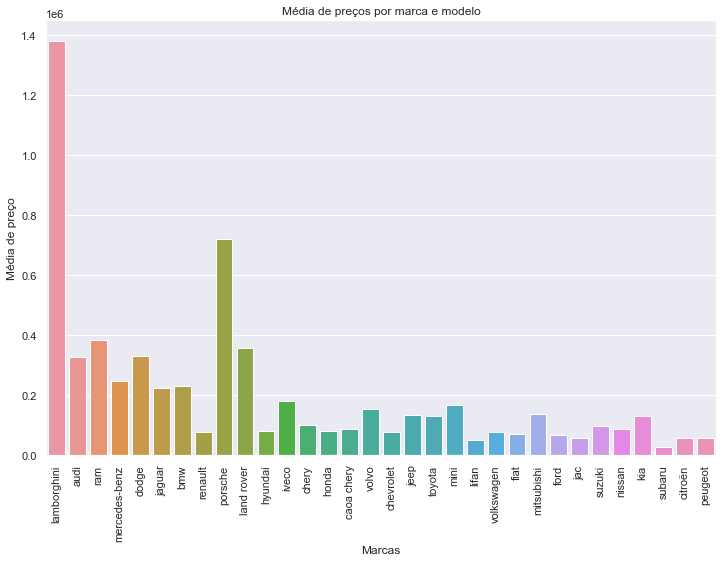

In [27]:
plt.xticks( rotation = 90)
ax = sns.barplot(data = media_marca, x = 'marca', y = 'media_por_marca')
ax.set(title = 'Média de preços por marca e modelo', xlabel = 'Marcas', ylabel = 'Média de preço');



# for p in ax.patches:
#     ax.annotate(humanize.intword(p.get_height()), (p.get_x()+0.4, p.get_height()),
#                 ha='center', va='bottom', color='black', fontsize=11)


### Quantos carros que estão a venda tiveram dono único?

In [28]:
query = """
    SELECT unico_dono, COUNT(*) quantidade FROM carros_info WHERE unico_dono = True
"""
dono_unico = pd.read_sql_query(query, conn)
dono_unico

,unico_dono,quantidade
0,1,214


### Automóveis que tiveram donos únicos são mais caros do que os que não tiveram?

In [29]:
query = """
    SELECT 
    round(AVG(CASE WHEN carinfo.unico_dono = True THEN car.price ELSE NULL END), 2) AS media_dono_unico,
    round(AVG(CASE WHEN carinfo.unico_dono = False THEN car.price ELSE NULL END), 2) AS media_mais_de_um_dono
    FROM carros car
    JOIN carros_info carinfo ON car.id = carinfo.id    
"""
unico_dono_mean = pd.read_sql_query(query, conn)
unico_dono_mean

,media_dono_unico,media_mais_de_um_dono
0,95730.84,100016.82


### Qual o ano do carro com mais Km rodados?

In [30]:
query = """
    SELECT ano, quilometros FROM carros GROUP BY (ano) ORDER BY (quilometros) DESC 
"""
ano_km = pd.read_sql_query(query, conn)
ano_km

,ano,quilometros
0,2014,65000
1,2008,65000
2,2012,65000
3,1985,65000
4,2016,65000
5,1982,65000
6,2009,65000
7,1998,65000
8,2011,65000
9,2003,65000


### Agrupe os automóveis por cor e quantidade de portas

In [31]:
query = """
    SELECT cor, portas, COUNT(portas) qtd_portas FROM carros GROUP BY(portas) 
"""
portas_mean = pd.read_sql_query(query, conn)
portas_mean

,cor,portas,qtd_portas
0,prateado,2,67
1,verde,3,26
2,branco,4,1094
3,branco,5,391


### Qual a média de preço por número de portas dos automóveis?

In [32]:
query = """
    SELECT portas, marca, modelo, AVG(price) media_preco_num_portas FROM carros GROUP BY(marca) ORDER BY(price) DESC 
"""
portas_mean_price = pd.read_sql_query(query, conn)
round(portas_mean_price, 2)

,portas,marca,modelo,media_preco_num_portas
0,2,lamborghini,gallardo,1380000.00
1,4,audi,q5,327395.00
2,4,ram,classic,382395.00
3,5,mercedes-benz,sprinter van,247640.69
4,4,dodge,ram 2500,330000.00
5,4,jaguar,f-pace,224700.00
6,5,bmw,x2,231427.51
7,5,renault,master,76539.99
8,4,porsche,cayenne,721633.33
9,5,land rover,range rover evoque,357022.83


In [33]:
query = """
    SELECT marca, COUNT(*) FROM carros WHERE marca = 'lamborghini' GROUP BY marca 

"""
portas_mean = pd.read_sql_query(query, conn)
portas_mean

,marca,COUNT(*)
0,lamborghini,1


### Qual a quantidade de marcas por modelo existem no conjunto de dados?

In [47]:
query = """
    SELECT marca, cor, COUNT(modelo) quantidade FROM carros GROUP BY(marca) ORDER BY(modelo) DESC

"""
marcas_por_modelo = pd.read_sql_query(query, conn)
marcas_por_modelo

,marca,cor,quantidade
0,volvo,branco,6
1,lifan,preto,2
2,bmw,branco,41
3,volkswagen,branco,278
4,hyundai,branco,129
5,nissan,preto,70
6,caoa chery,cinza,3
7,chery,preto,10
8,suzuki,preto,5
9,fiat,prateado,168


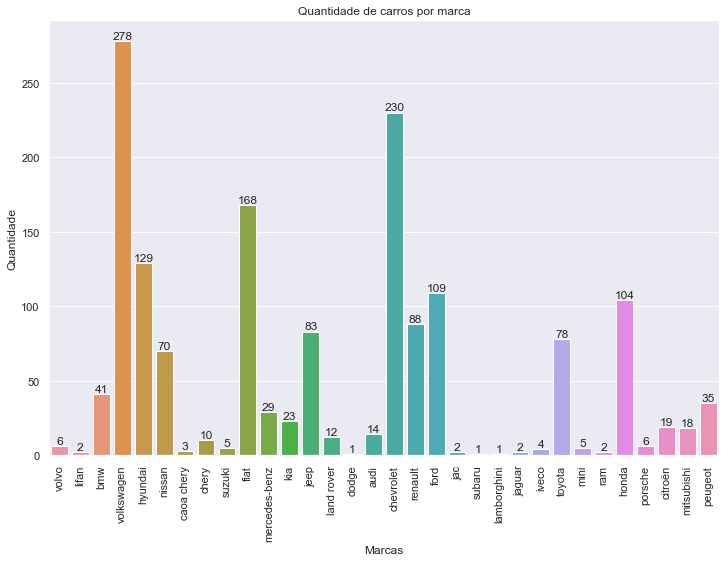

In [49]:
plt.xticks( rotation = 90)
ax = sns.barplot(data = marcas_por_modelo, x = 'marca', y = 'quantidade')
ax.set(title = 'Quantidade de carros por marca', xlabel = 'Marcas', ylabel = 'Quantidade');

for i in ax.containers:
    ax.bar_label(i)

# Dashboard

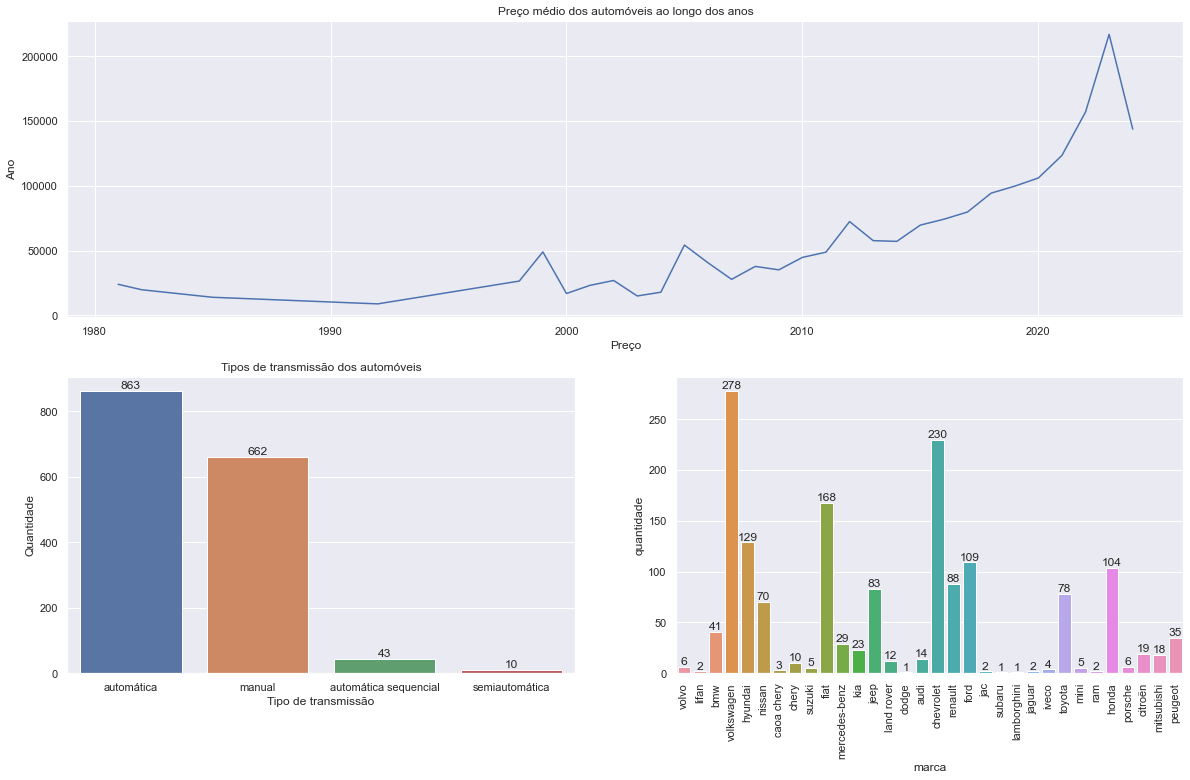

In [51]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20,12))
specs = gridspec.GridSpec( ncols=2, nrows=2, figure = fig)

ax1 = fig.add_subplot(specs[0, :])
ax2 = fig.add_subplot(specs[1, 0])
ax3 = fig.add_subplot(specs[1, 1])

###########################################################
# Gráfico 1 Preço médio dos automóveis ao longo dos anos.
query = "SELECT ano, AVG(price) avg_por_ano FROM carros GROUP BY(ano) ORDER BY(avg_por_ano) DESC"
avg_ano = pd.read_sql_query(query, conn)
round(avg_ano, 2)

sns.lineplot(data = avg_ano, x = 'ano', y = 'avg_por_ano', ax=ax1)
ax1.set(title = 'Preço médio dos automóveis ao longo dos anos', xlabel = 'Preço', ylabel = 'Ano');
    
############################################################
# Gráfico 2 Tipos de transmissão 
query = "SELECT cor, AVG(price) media_por_cor FROM carros GROUP BY (cor) ORDER BY (media_por_cor) DESC;"
preco_medio_cor = pd.read_sql_query(query, conn)
round(preco_medio_cor, 2)

sns.barplot(data = tipo_transmissao, x = 'tipo_de_transmissao', y = 'quantidade', ax=ax2)
ax2.set(title = 'Tipos de transmissão dos automóveis', xlabel = 'Tipo de transmissão', ylabel = 'Quantidade');

for i in ax2.containers:
    ax2.bar_label(i)
    
############################################################
# Gráfico 3 Quantidade de carros por marca

query = """
    SELECT marca, cor, COUNT(modelo) quantidade FROM carros GROUP BY(marca) ORDER BY(modelo) DESC

"""
marcas_por_modelo = pd.read_sql_query(query, conn)
marcas_por_modelo

plt.xticks( rotation = 90)
sns.barplot(data = marcas_por_modelo, x = 'marca', y = 'quantidade', ax=ax3)
ax.set(title = 'Quantidade de carros por marca', xlabel = 'Marcas', ylabel = 'Quantidade');

for i in ax3.containers:
    ax3.bar_label(i)

c:\users\sharkoon\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


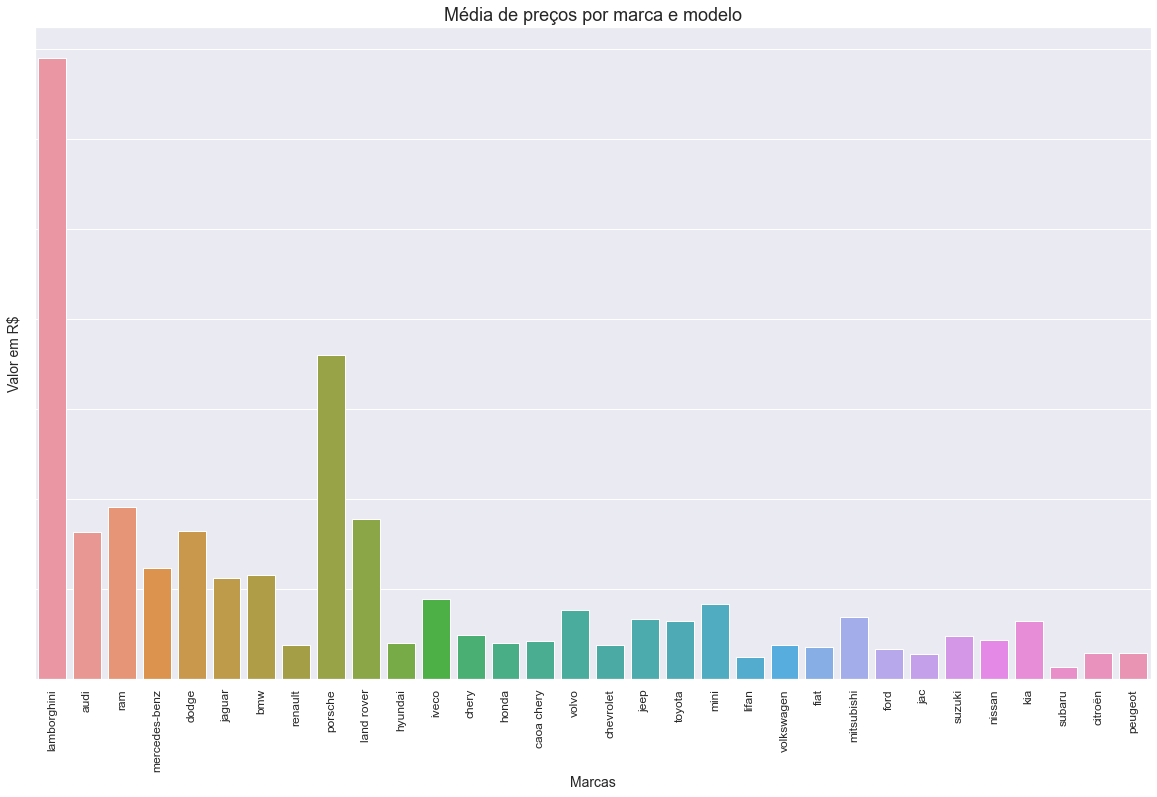

In [37]:
fig = plt.figure(figsize=(20,12))
specs = gridspec.GridSpec( ncols=1, nrows=1, figure = fig)

ax1 = fig.add_subplot(specs[0, 0])

query = """
    SELECT marca, modelo, AVG(price) media_por_marca FROM carros GROUP BY(marca) ORDER BY(price) DESC
    
"""
media_marca = pd.read_sql_query(query, conn)
round(media_marca, 2)

plt.xticks( rotation = 90)
sns.barplot(data = media_marca, x = 'marca', y = 'media_por_marca', ax=ax1)
ax1.set_title('Média de preços por marca e modelo', fontsize=18)
ax1.set_xlabel('Marcas', fontsize=14)
ax1.set_ylabel('Valor em R$', fontsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, fontsize=12)
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize=12)

plt.rcParams["axes.formatter.useoffset"] = False

# for i in ax1.containers:
#     ax1.bar_label(i)

In [38]:
query = """
SELECT 'manual' AS tipo_de_transmissao, COUNT(*) AS quantidade FROM carros WHERE tipo_de_transmissao = 'manual'
"""
analise_descritiva = pd.read_sql_query(query, conn)
analise_descritiva

,tipo_de_transmissao,quantidade
0,manual,662


In [39]:
query = """
    SELECT
    marca,
    modelo,
    cor,
    COUNT(marca) AS quantidade,
    portas,
    price
    FROM carros
    WHERE price >= 89000 AND price <= 120000
    GROUP BY(marca)
    ORDER BY(price) DESC
"""
check_1 = pd.read_sql_query(query, conn)
check_1

,marca,modelo,cor,quantidade,portas,price
0,mercedes-benz,classe c,preto,2,4,120000.0
1,hyundai,tucson,branco,22,4,119900.0
2,chery,tiggo 5x,preto,5,5,118483.0
3,bmw,serie 2,preto,6,5,114900.0
4,kia,sportage,branco,6,5,111900.0
5,honda,civic,preto,29,4,109990.0
6,mitsubishi,asx,cinza-escuro,3,5,109900.0
7,mini,countryman,branco,1,4,108890.0
8,nissan,versa,branco,11,4,105900.0
9,jeep,compass,prateado,20,4,103890.0


In [40]:
query = """
    SELECT marca, modelo, AVG(price)  FROM carros  WHERE marca = 'audi'
"""
analise_descritiva = pd.read_sql_query(query, conn)
analise_descritiva

,marca,modelo,AVG(price)
0,audi,q5,327395.0


In [41]:
SELECT
    marca,
    modelo,
    cor,
    ano,
    COUNT(marca) AS quantidade,
    SUM(quantidade) AS total_quantidade,
    portas,
    price
FROM carros
WHERE price >= 89000 AND price <= 120000
GROUP BY marca
ORDER BY price DESC;


IndentationError: unexpected indent (4188464823.py, line 2)

In [ ]:
query_media = """
SELECT 
    FLOOR(AVG(ano)) as media_ANO,
    MAX(ano) as max_ANO,
    MIN(ano) as min_ANO,
    (
        SELECT AVG(ano)
        FROM (
            SELECT ano
            FROM (
                SELECT @rownum:=@rownum+1 AS rownum, ano
                FROM carros, (SELECT @rownum:=0) r
                ORDER BY ano
            ) ranked
            WHERE rownum IN (FLOOR((@rownum+1)/2), FLOOR((@rownum+2)/2))
        ) mediana_ANO
    ) as mediana_ANO,    
    STDDEV(ano) as std_ANO,
    ########################################################################
    AVG(motor) as media_MOTOR,
    MAX(motor) as max_MOTOR,
    MIN(motor) as min_MOTOR,
    (
        SELECT AVG(motor)
        FROM (
            SELECT motor
            FROM (
                SELECT @rownum_motor:=@rownum_motor+1 AS rownum_motor, motor
                FROM carros, (SELECT @rownum_motor:=0) r
                ORDER BY motor
            ) ranked_motor
            WHERE rownum_motor IN (FLOOR((@rownum_motor+1)/2), FLOOR((@rownum_motor+2)/2))
        ) mediana_MOTOR
    ) as mediana_MOTOR,
    STDDEV(motor) as std_MOTOR,
    #######################################################################
    AVG(portas) as media_PORTAS,
    MAX(portas) as max_PORTAS,
    MIN(portas) as min_PORTAS,
    (
        SELECT AVG(portas)
        FROM (
            SELECT portas
            FROM (
                SELECT @rownum_portas:=@rownum_portas+1 AS rownum_portas, portas
                FROM carros, (SELECT @rownum_portas:=0) r
                ORDER BY portas
            ) ranked_portas
            WHERE rownum_portas IN (FLOOR((@rownum_portas+1)/2), FLOOR((@rownum_portas+2)/2))
        ) mediana_PORTAS
    ) as mediana_PORTAS,
    STDDEV(portas) as std_PORTAS,
    ########################################################################
    AVG(quilometros) as media_KM,
    MAX(quilometros) as max_KM,
    MIN(quilometros) as min_KM,
    (
        SELECT AVG(quilometros)
        FROM (
            SELECT quilometros
            FROM (
                SELECT @rownum_portas:=@rownum_quilometros+1 AS rownum_quilometros, quilometros
                FROM carros, (SELECT @rownum_quilometros:=0) r
                ORDER BY quilometros
            ) ranked_quilometros
            WHERE rownum_quilometros IN (FLOOR((@rownum_quilometros+1)/2), FLOOR((@rownum_quilometros+2)/2))
        ) mediana_KM
    ) as mediana_KM,
    STDDEV(quilometros) as std_KM,
    #########################################################################
    AVG(price) as media_PRICE,
    MAX(price) as max_PRICE,
    MIN(price) as min_PRICE,
    (
        SELECT AVG(price)
        FROM (
            SELECT price
            FROM (
                SELECT @rownum_price:=@rownum_price+1 AS rownum_price, price
                FROM carros, (SELECT @rownum_price:=0) r
                ORDER BY price
            ) ranked_price
            WHERE rownum_price IN (FLOOR((@rownum_price+1)/2), FLOOR((@rownum_price+2)/2))
        ) mediana_PRICE
    ) as mediana_PRICE,
    STDDEV(price) as std_PRICE
        

    
FROM carros;

"""
    
# Executar a consulta SQL e armazenar o resultado em um DataFrame
ad_query_media = pd.read_sql_query(query_media, conn)

# Transformar as colunas em linhas usando a função melt()
# ad_query_media = ad_query_media.melt()

# Exibir o resultado
print(ad_query_media)

In [ ]:
query_media = """
SELECT 
    FLOOR(AVG(ano)) as media_ANO,
    MAX(ano) as max_ANO,
    MIN(ano) as min_ANO,
    (
        SELECT AVG(ano)
        FROM (
            SELECT ano
            FROM (
                SELECT @rownum:=@rownum+1 AS rownum, ano
                FROM carros, (SELECT @rownum:=0) r
                ORDER BY ano
            ) ranked
            WHERE rownum IN (FLOOR((@rownum+1)/2), FLOOR((@rownum+2)/2))
        ) mediana_ANO
    ) as mediana_ANO,    
    STDDEV(ano) as std_ANO,
    ########################################################################
    AVG(motor) as media_MOTOR,
    MAX(motor) as max_MOTOR,
    MIN(motor) as min_MOTOR,
    (
        SELECT AVG(motor)
        FROM (
            SELECT motor
            FROM (
                SELECT @rownum_motor:=@rownum_motor+1 AS rownum_motor, motor
                FROM carros, (SELECT @rownum_motor:=0) r
                ORDER BY motor
            ) ranked_motor
            WHERE rownum_motor IN (FLOOR((@rownum_motor+1)/2), FLOOR((@rownum_motor+2)/2))
        ) mediana_MOTOR
    ) as mediana_MOTOR,
    STDDEV(motor) as std_MOTOR,
    #######################################################################
    AVG(portas) as media_PORTAS,
    MAX(portas) as max_PORTAS,
    MIN(portas) as min_PORTAS,
    (
        SELECT AVG(portas)
        FROM (
            SELECT portas
            FROM (
                SELECT @rownum_portas:=@rownum_portas+1 AS rownum_portas, portas
                FROM carros, (SELECT @rownum_portas:=0) r
                ORDER BY portas
            ) ranked_portas
            WHERE rownum_portas IN (FLOOR((@rownum_portas+1)/2), FLOOR((@rownum_portas+2)/2))
        ) mediana_PORTAS
    ) as mediana_PORTAS,
    STDDEV(portas) as std_PORTAS,
    ########################################################################
    AVG(quilometros) as media_KM,
    MAX(quilometros) as max_KM,
    MIN(quilometros) as min_KM,
    (
        SELECT AVG(quilometros)
        FROM (
            SELECT quilometros
            FROM (
                SELECT @rownum_portas:=@rownum_quilometros+1 AS rownum_quilometros, quilometros
                FROM carros, (SELECT @rownum_quilometros:=0) r
                ORDER BY quilometros
            ) ranked_quilometros
            WHERE rownum_quilometros IN (FLOOR((@rownum_quilometros+1)/2), FLOOR((@rownum_quilometros+2)/2))
        ) mediana_KM
    ) as mediana_KM,
    STDDEV(quilometros) as std_KM,
    #########################################################################
    
FROM carros;


"""
    
# Executar a consulta SQL e armazenar o resultado em um DataFrame
ad_query_media = pd.read_sql_query(query_media, conn)

# Transformar as colunas em linhas usando a função melt()
ad_query_media = ad_query_media.melt()

# Exibir o resultado
print(ad_query_media)